In [108]:
import numpy as np
from vlnce_baselines.config.default import get_config

ModuleNotFoundError: No module named 'vlnce_baselines'

In [ ]:
# exp_config = "vlnce_baselines/config/rxr_baselines/rxr_cma_en.yaml"
# config = get_config(exp_config, None)
# dataset = TeacherRecollectionDataset(self.config)

In [4]:
import gzip
import json

trajectories_file = '/home/sax1rng/Projects/VLN-CE-Plan/data/trajectories_dirs/rxr_en_guide_trim250/trajectories.json.gz'
with gzip.open(trajectories_file, "rt") as f:
    trajectories = json.load(f)

In [21]:
print(len(trajectories.keys()))

59454


In [323]:
gt_data_files = ['/home/sax1rng/Projects/VLN-CE-Plan/data/datasets/RxR_VLNCE_v0/train/train_guide_gt.json.gz']
gt_data = {}
for gt_data_file in gt_data_files:
    with gzip.open(gt_data_file,"rt",) as f:
        gt_data.update(json.load(f))

In [55]:
# gt_data has 60300 keys
print((gt_data['28080'].keys()))
print((gt_data['28080']['actions'][0]))
# print(gt_data.keys())
gt_data_keys = [int(k) for k in list(gt_data.keys())]
# print(gt_data_keys)
print(max(gt_data_keys))
# print((gt_data['28080']['actions']))
# print((gt_data['28080']['locations']))
# print((gt_data['28080']['forward_steps']))

dict_keys(['locations', 'actions', 'forward_steps'])
2
60300


In [6]:
import gzip
data_file = '/home/sax1rng/Projects/VLN-CE-Plan/data/datasets/RxR_VLNCE_v0/train/train_guide.json.gz'
data = {}
with gzip.open(data_file,"rt",) as f:
    data.update(json.load(f))
print("dataset size:", len(data['episodes']))

dataset size: 60300


In [7]:
print(data['episodes'][0].keys())

{'episode_id': '1', 'trajectory_id': '0', 'scene_id': 'mp3d/SN83YJsR3w2/SN83YJsR3w2.glb', 'info': {'role': 'guide'}, 'instruction': {'instruction_id': '0', 'instruction_text': "You will start by standing in front of a glass door and on your right is a doorway. Turn around and you will see a doorway to the washroom. Walk towards the doorway and inside the washroom. Once you're there, stand in between the sink and the bathtub and once you're there, you're done.", 'language': 'en-US', 'annotator_id': '0', 'edit_distance': 0.07692307692307693, 'timed_instruction': [{'end_time': 1.5, 'word': 'You', 'start_time': 1.0}, {'end_time': 1.6, 'word': 'will', 'start_time': 1.5}, {'start_time': 1.6, 'end_time': 2.2, 'word': 'start'}, {'start_time': 2.2, 'word': 'by', 'end_time': 2.5}, {'word': 'standing', 'start_time': 2.5, 'end_time': 3.3}, {'start_time': 3.3, 'end_time': 3.6, 'word': 'in'}, {'word': 'front', 'start_time': 3.6, 'end_time': 3.8}, {'word': 'of', 'start_time': 3.8, 'end_time': 4.4}, {

In [17]:
from tqdm import trange
import numpy as np
dataset_size = len(data['episodes'])
en_idx = [i for i in range(dataset_size) if ('en' in data['episodes'][i]['instruction']['language'])]

ids_arr_int= np.zeros((len(en_idx), 3), dtype=int)
ids_arr = []
for i, idx in enumerate(en_idx):
    ids_arr_int[i,0] = int(data['episodes'][idx]['episode_id'])
    ids_arr_int[i,1] = int(data['episodes'][idx]['instruction']['instruction_id'])
    ids_arr_int[i,2] = int(data['episodes'][idx]['trajectory_id'])
    
    ids_arr.append([
        data['episodes'][idx]['episode_id'],
        data['episodes'][idx]['instruction']['instruction_id'],
        data['episodes'][idx]['trajectory_id']
    ])
print(ids_arr)
print(ids_arr_int[:50,0])
print(ids_arr_int[:50,2])

[['1', '0', '0'], ['5', '46170', '0'], ['6', '46171', '0'], ['13', '44357', '3'], ['14', '44358', '3'], ['18', '123623', '3'], ['19', '9', '4'], ['20', '10', '4'], ['27', '77796', '4'], ['31', '2415', '5'], ['35', '111987', '5'], ['36', '111988', '5'], ['37', '14', '6'], ['38', '15', '6'], ['39', '65524', '6'], ['52', '91916', '9'], ['53', '91917', '9'], ['54', '108517', '9'], ['55', '24', '10'], ['56', '25', '10'], ['57', '4141', '10'], ['64', '28', '12'], ['71', '51813', '12'], ['72', '51814', '12'], ['73', '37', '16'], ['74', '38', '16'], ['75', '3615', '16'], ['85', '71512', '19'], ['86', '71513', '19'], ['87', '97187', '19'], ['91', '2136', '22'], ['92', '2137', '22'], ['93', '79771', '22'], ['100', '60', '24'], ['101', '35755', '24'], ['102', '35756', '24'], ['112', '42651', '25'], ['113', '42652', '25'], ['117', '107535', '25'], ['121', '55567', '26'], ['122', '96270', '26'], ['123', '96271', '26'], ['127', '71', '29'], ['128', '48516', '29'], ['129', '48517', '29'], ['136', '72

In [108]:
print(max(instr_ids))
print(max(episode_ids))

126064
60300


In [82]:
import jsonlines
rxr_data_files = ['/fs/scratch/rng_cr_aas3_gpu_user_c_lf/sp02_025_rrt/datasets/rxr-data/rxr_train_guide.jsonl.gz']
rxr_data = []

for rxr_data_file in rxr_data_files:
    with gzip.open(rxr_data_file,"rb",) as f:
        j_reader = jsonlines.Reader(f)
        for episode in j_reader:
            rxr_data.append(episode)

In [74]:
import numpy as np
feature_file = '/home/sax1rng/Projects/VLN-CE-Plan/data/datasets/RxR_VLNCE_v0/text_features/rxr_train/054127_en_text_features.npz'
features = np.load(feature_file)
print((features.files))
print(features['tokens'].shape)
print(features['features'].shape)

['tokens', 'features']
(183,)
(183, 768)


In [75]:
result_file_val_seen = '/home/sax1rng/Projects/VLN-CE-Plan/outputs/rxr_cma_en/pretrained/evals/stats_ckpt_0_val_seen.json'
result_file_val_unseen = '/home/sax1rng/Projects/VLN-CE-Plan/outputs/rxr_cma_en/pretrained/evals/stats_ckpt_0_val_unseen.json'

result_val_seen = {}
result_val_unseen = {}
with open(result_file_val_seen) as f:
    result_val_seen.update(json.load(f))
    
with open(result_file_val_unseen) as f:
    result_val_unseen.update(json.load(f))
print("Val seen: ", result_val_seen)
print("Val unseen: ", result_val_unseen)

Val seen:  {'steps_taken': 163.17915742793792, 'path_length': 8.008822543150162, 'distance_to_goal': 11.663570659702227, 'success': 0.12416851441241686, 'oracle_success': 0.20044345898004434, 'spl': 0.10602345971978006, 'ndtw': 0.36739656820025635}
Val unseen:  {'steps_taken': 165.18860724993186, 'path_length': 6.982689494432815, 'distance_to_goal': 10.834885327247498, 'success': 0.13055328427364404, 'oracle_success': 0.2030526028890706, 'spl': 0.11350013528819897, 'ndtw': 0.3925179461242119}


In [379]:
result_file_val_seen = '/home/sax1rng/Projects/VLN-CE-Plan/outputs/rxr_cma_en/2023_09_16-13_25_20/evals/stats_ckpt_4_val_seen.json'
result_file_val_unseen = '/home/sax1rng/Projects/VLN-CE-Plan/outputs/rxr_cma_en/2023_09_16-13_25_20/evals/stats_ckpt_7_val_unseen.json'

result_val_seen = {}
result_val_unseen = {}
with open(result_file_val_seen) as f:
    result_val_seen.update(json.load(f))
    
with open(result_file_val_unseen) as f:
    result_val_unseen.update(json.load(f))
print("Val seen: ", result_val_seen)
print("Val unseen: ", result_val_unseen)

Val seen:  {'steps_taken': 152.95831485587584, 'path_length': 8.031009357902542, 'distance_to_goal': 13.027295682551195, 'success': 0.06740576496674058, 'oracle_success': 0.14279379157427938, 'spl': 0.048149353548173277, 'ndtw': 0.2636714221840803}
Val unseen:  {'steps_taken': 150.04115562823657, 'path_length': 6.138245940376352, 'distance_to_goal': 11.964803222904951, 'success': 0.07249931861542655, 'oracle_success': 0.15290269828291086, 'spl': 0.06034425786764989, 'ndtw': 0.311304628669295}


# Load data

In [21]:
import gzip, json
data_type='train'
data_loc = f'/home/sax1rng/Projects/VLN-CE-Plan/data/datasets/RxR_VLNCE_v0/{data_type}/{data_type}_guide_high_level_instr.json.gz'
data_hl = {}
with gzip.open(data_loc,"rt",) as f:
    data_hl.update(json.load(f))

data_location = f'/home/sax1rng/Projects/VLN-CE-Plan/data/datasets/RxR_VLNCE_v0/{data_type}/{data_type}_guide.json.gz'
data = {}
with gzip.open(data_location,"rt",) as f:
    data.update(json.load(f))

gt_data_files = [f'/home/sax1rng/Projects/VLN-CE-Plan/data/datasets/RxR_VLNCE_v0/{data_type}/{data_type}_guide_gt.json.gz']
gt_data = {}
for gt_data_file in gt_data_files:
    with gzip.open(gt_data_file,"rt",) as f:
        gt_data.update(json.load(f))

In [344]:
import numpy as np
dataset_size = len(data['episodes'])
en_idx = [i for i in range(dataset_size) if ('en' in data['episodes'][i]['instruction']['language'])]
episode_id = np.random.choice(en_idx) # 4301 is not right
print("Full instruction:\n", data['episodes'][episode_id]['instruction']['instruction_text'])
print("\n High level instruction: \n", data_hl['episodes'][episode_id]['instruction']['high_level_instruction'])

Full instruction:
 you will start facing a dining table at a child's height level, take one step towards the yellow counter on your left. You should be standing up now, take one step towards the plant in a yellow pot next to the room in front you. Take another step towards that same plant, now turn to the right, you should be standing next to the plant in a yellow pot and in front of you there will be a couch, take on step towards the couch, you should be standing to the left of the couch, looking at the painting on the wall of some kids playing in grass, take on step towards it, you will be at kid's level again, in front of you there will be stairs, take one step onto the stairs, take another step, and now take 3 steps to go up the stairs. Take another step and you should be standing at the edge of the stairs the very top, looking to the left, follow he railing, take one step towards the guitars, take another step towards the drums, you should be at kid's height level again, take anot

In [345]:
pose_traces_path = '/fs/scratch/rng_cr_aas3_gpu_user_c_lf/sp02_025_rrt/datasets/rxr-data/pose_traces/rxr_train/'
pose_traces_file_name = "{id:06}_guide_pose_trace.npz"

instruction_text = data['episodes'][episode_id]['instruction']['instruction_text']
instruction_id = data['episodes'][episode_id]['instruction']['instruction_id']

# instruction_id = 46944
pose_traces_file_name = pose_traces_path + pose_traces_file_name.format(id=int(instruction_id))
pose_traces = np.load(pose_traces_file_name)
print(pose_traces.files)

['pano', 'time', 'extrinsic_matrix', 'intrinsic_matrix', 'image_mask', 'feature_weights', 'text_masks']


In [346]:
print('Text masks shape', pose_traces['text_masks'].shape)
timed_instr_len = len(data['episodes'][episode_id]['instruction']['timed_instruction'])
print('Number of words:', timed_instr_len)

print('Final time pose traces', pose_traces['time'][-1])
print('End time of last word', data['episodes'][episode_id]['instruction']['timed_instruction'][-1]['end_time'])

print('Number of timesteps:', len(pose_traces['time']))
print('Number of reference path waypoints:', len(data['episodes'][episode_id]['reference_path']))

print(data['episodes'][episode_id]['instruction']['timed_instruction'])
# for w in range(timed_instr_len):
#     if 'start_time' in data['episodes'][episode_id]['instruction']['timed_instruction'][w].keys():
#         continue
#     else:
#         print(f'key does not exist in {w}')
#     if 'end_time' in data['episodes'][episode_id]['instruction']['timed_instruction'][w].keys():
#         continue
#     else:
#         print(f'key does not exist in {w}')

Text masks shape (15, 287)
Number of words: 232
Final time pose traces 183.131051
End time of last word 181.8
Number of timesteps: 10538
Number of reference path waypoints: 15
[{'start_time': 1.5, 'word': 'you', 'end_time': 2}, {'word': 'will', 'start_time': 2, 'end_time': 2.1}, {'start_time': 2.1, 'word': 'start', 'end_time': 2.8}, {'start_time': 2.8, 'word': 'facing', 'end_time': 4.1}, {'word': 'a', 'start_time': 4.1, 'end_time': 5.1}, {'start_time': 5.1, 'end_time': 7.1, 'word': 'dining'}, {'start_time': 7.1, 'word': 'table', 'end_time': 7.4}, {'word': 'at', 'start_time': 7.4, 'end_time': 8.9}, {'word': 'a', 'end_time': 9, 'start_time': 8.9}, {'start_time': 9, 'end_time': 9.8, 'word': "child's"}, {'word': 'height', 'start_time': 9.8, 'end_time': 10.5}, {'start_time': 10.5, 'word': 'level,', 'end_time': 11.1}, {'start_time': 12.9, 'end_time': 13.8, 'word': 'take'}, {'end_time': 14.4, 'start_time': 13.8, 'word': 'one'}, {'start_time': 14.4, 'end_time': 14.6, 'word': 'step'}, {'start_t

In [391]:
# Finding the jump points
x_t = pose_traces['extrinsic_matrix'][:-1,0, 3]
x_tp1 = pose_traces['extrinsic_matrix'][1:,0, 3]
diff = x_tp1 - x_t
jumps = abs(diff) > 0.0001
jumps_ts = np.zeros(sum(jumps)+1)

jumps_ts[:-1] = pose_traces['time'][:-1][jumps]
jumps_ts[-1] = data['episodes'][episode_id]['instruction']['timed_instruction'][-1]['end_time']
print('Number of forward steps:', sum(jumps)+1)
j_ts = 0
t = jumps_ts[j_ts]
instr = []
for l in range(timed_instr_len):
    if 'end_time' in data['episodes'][episode_id]['instruction']['timed_instruction'][l].keys():
        if data['episodes'][episode_id]['instruction']['timed_instruction'][l]['end_time'] <= t:
            instr.append(data['episodes'][episode_id]['instruction']['timed_instruction'][l]['word'])
        else:
            print(f'Step {j_ts+1}:', ' '.join(instr))
            j_ts += 1
            t = jumps_ts[j_ts]
            instr = [data['episodes'][episode_id]['instruction']['timed_instruction'][l]['word']]
    else:
        instr.append(data['episodes'][episode_id]['instruction']['timed_instruction'][l]['word'])
print(f'Step {j_ts+1}:', ' '.join(instr))

Number of forward steps: 15
Step 1: you will start facing a dining table at a child's height level, take one step towards the yellow counter on your left.
Step 2: You should be standing up now, take one step towards the plant in a yellow pot next to the room in front you.
Step 3: Take another step towards that same plant,
Step 4: now turn to the right, you should be standing next to the plant in a yellow pot and in front of you there will be a couch, take on step towards the
Step 5: couch, you should be standing to the left of the couch, looking at the painting on the wall of some kids playing in grass, take on step towards it,
Step 6: you will be at kid's level again, in front of you there will be stairs, take one step onto
Step 7: the stairs, take another
Step 8: step, and now take 3 steps to go up the stairs.
Step 9: Take
Step 10: another
Step 11: step and
Step 12: you should be standing at the edge of the stairs the very top, looking to the left, follow he railing, take one step to

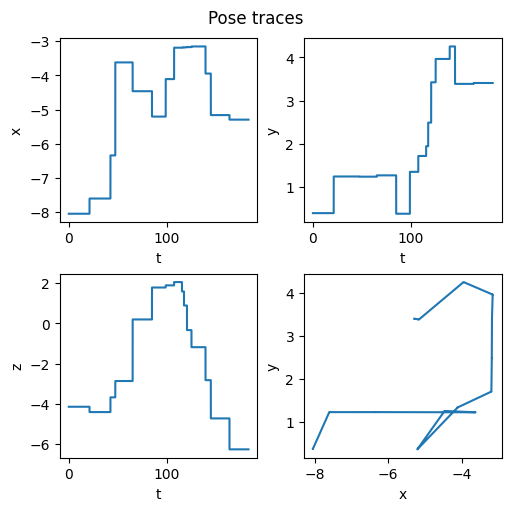

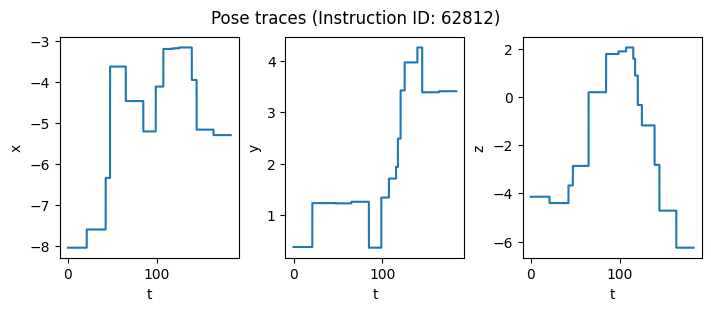

In [394]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(5, 5), constrained_layout=True)

fig.suptitle('Pose traces', fontsize=12)
axs[0,0].plot(pose_traces['time'], pose_traces['extrinsic_matrix'][:,0, 3])
axs[0,0].set_xlabel('t'); axs[0,0].set_ylabel('x')
axs[0,1].plot(pose_traces['time'], pose_traces['extrinsic_matrix'][:,1, 3])
axs[0,1].set_xlabel('t'); axs[0,1].set_ylabel('y')
axs[1,0].plot(pose_traces['time'], pose_traces['extrinsic_matrix'][:,2, 3])
axs[1,0].set_xlabel('t'); axs[1,0].set_ylabel('z')
axs[1,1].plot(pose_traces['extrinsic_matrix'][:,0, 3], pose_traces['extrinsic_matrix'][:,1, 3])
axs[1,1].set_xlabel('x'); axs[1,1].set_ylabel('y')
#axs[1,1].plot(pose_traces['time'][:-1], diff)
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(7, 3), constrained_layout=True)
fig.suptitle(f'Pose traces (Instruction ID: {instruction_id})', fontsize=12)
axs[0].plot(pose_traces['time'], pose_traces['extrinsic_matrix'][:,0, 3])
axs[0].set_xlabel('t'); axs[0].set_ylabel('x')
axs[1].plot(pose_traces['time'], pose_traces['extrinsic_matrix'][:,1, 3])
axs[1].set_xlabel('t'); axs[1].set_ylabel('y')
axs[2].plot(pose_traces['time'], pose_traces['extrinsic_matrix'][:,2, 3])
axs[2].set_xlabel('t'); axs[2].set_ylabel('z')
#axs[1,1].plot(pose_traces['time'][:-1], diff)
plt.show()

Number of locations (80, 3)
Number of actions 117
Number of forward steps in gt_data 79
Number of forward steps in gt_data from actions 79
dt 1.5652226581196582


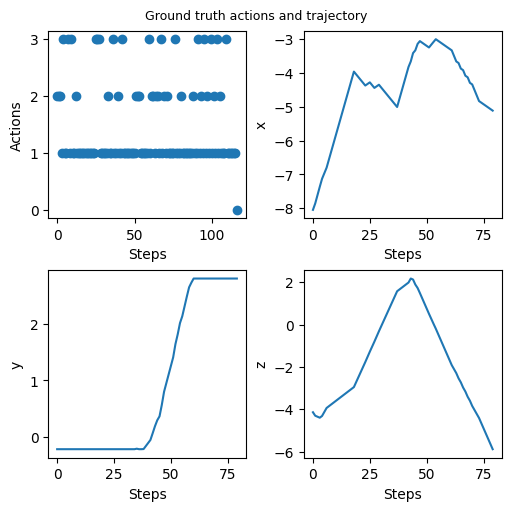

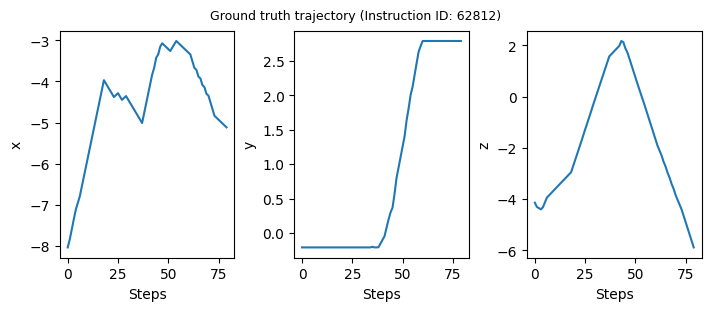

In [396]:
locations = np.array(gt_data[f'{episode_id}']['locations'])
num_actions = len(gt_data[f'{episode_id}']['actions'])
print('Number of locations', locations.shape)
print('Number of actions', num_actions)
print('Number of forward steps in gt_data', (gt_data[f'{episode_id}']['forward_steps']))
print('Number of forward steps in gt_data from actions', np.sum(np.array(gt_data[f'{episode_id}']['actions'])==1))
print('dt', pose_traces['time'][-1]/num_actions)

fig, axs = plt.subplots(2,2, figsize=(5, 5), constrained_layout=True)
fig.suptitle('Ground truth actions and trajectory', fontsize=9)

axs[0,0].scatter(range(len(gt_data[f'{episode_id}']['actions'])), gt_data[f'{episode_id}']['actions'])
axs[0,0].set_xlabel('Steps'); axs[0,0].set_ylabel('Actions')

axs[0,1].plot(locations[:,0])
axs[0,1].set_xlabel('Steps'); axs[0,1].set_ylabel('x')

axs[1,0].plot(locations[:,1])
axs[1,0].set_xlabel('Steps'); axs[1,0].set_ylabel('y')

axs[1,1].plot(locations[:,2])
axs[1,1].set_xlabel('Steps'); axs[1,1].set_ylabel('z')
plt.show()


fig, axs = plt.subplots(1,3, figsize=(7, 3), constrained_layout=True)
fig.suptitle(f'Ground truth trajectory (Instruction ID: {instruction_id})', fontsize=9)


axs[0].plot(locations[:,0])
axs[0].set_xlabel('Steps'); axs[0].set_ylabel('x')

axs[1].plot(locations[:,1])
axs[1].set_xlabel('Steps'); axs[1].set_ylabel('y')

axs[2].plot(locations[:,2])
axs[2].set_xlabel('Steps'); axs[2].set_ylabel('z')
plt.show()

In [350]:
print(locations[:,0])
print(pose_traces['extrinsic_matrix'][:-1, 0, 3][jumps])

[-8.04508972 -7.85592651 -7.61037922 -7.36483192 -7.12869501 -6.96524096
 -6.8017869  -6.56564999 -6.32951307 -6.09337616 -5.85723925 -5.62110233
 -5.38496542 -5.14882851 -4.91269159 -4.67655468 -4.44041777 -4.20428085
 -3.9681437  -4.0502367  -4.13232994 -4.21442318 -4.29651642 -4.37860966
 -4.33163595 -4.28466225 -4.36675549 -4.44884872 -4.40187502 -4.35490131
 -4.43699455 -4.51908779 -4.60118103 -4.68327427 -4.76536751 -4.84746075
 -4.92955399 -5.01164722 -4.77551031 -4.5393734  -4.30323648 -4.06709957
 -3.83096242 -3.66750836 -3.42196107 -3.33986783 -3.15070438 -3.06861115
 -3.11558485 -3.16255856 -3.20953226 -3.25650597 -3.17441273 -3.09231949
 -3.01223326 -3.05920696 -3.10618067 -3.15315437 -3.20012808 -3.24710178
 -3.29407549 -3.34104919 -3.50450325 -3.66795731 -3.71493101 -3.87838507
 -3.92535877 -4.08881283 -4.13578653 -4.29924059 -4.34621429 -4.50966835
 -4.67312241 -4.83657646 -4.88355017 -4.93052387 -4.97749758 -5.02447128
 -5.07144499 -5.11841869]
[-8.04511833 -7.6007123  

In [352]:
for pt in pose_traces['extrinsic_matrix'][:-1, 0, 3][jumps]:
    print(min(abs((pt - locations[:,0]))))

2.86102294921875e-05
0.009666919708251953
0.010587692260742188
0.046631813049316406
0.014315128326416016
0.05634784698486328
0.02023458480834961
0.009556055068969727
0.011547327041625977
0.004532337188720703
0.0010912418365478516
0.001300811767578125
0.021074771881103516
0.012402057647705078


In [378]:
stepwise_instruction_steps_words = [["You're", 'facing', 'the', 'table'], ['Turn', 'towards', 'your', 'left'], ['Go', 'near', 'the', 'door'], ['Exit', 'the', 'room'], ['Go', 'straight', 'till', 'the', 'end'], ['To', 'the', 'left', "you'll", 'find', 'plants'], ['Opposite', 'to', 'you', "you'll", 'find', 'brown', 'door'], ['Few', 'steps', 'away', 'from', 'the', 'door', "you'll", 'find', 'your', 'destination']]
print(stepwise_instruction_steps_words)
total_words=sum([len(i) for i in stepwise_instruction_steps_words])

words_in_gt_instruction = ["You're", 'facing', 'the', 'table', 'turn', 'towards', 'your', 'left', 'go', 'near', 'the', 'door', 'exit', 'the', 'room', 'and', 'go', 'straight', 'till', 'the', 'end', 'to', 'the', 'left', "you'll", 'find', 'plants', 'and', 'opposite', 'to', "you you'll", 'find', 'brown', 'door', 'few', 'steps', 'away', 'from', 'the', 'door', "you'll", 'find', 'your', 'destination']

instr = stepwise_instruction_steps_words[0]
first_word = instr[0]
gt_word_idx = (first_word == words_in_gt_instruction)
print(words_in_gt_instruction.index('facing'))

current_idx_gt_words = 4
window = 2
last_word_idx = words_in_gt_instruction[current_idx_gt_words+len(instr)-window:current_idx_gt_words+len(instr)+window].index(instr[-1])
print(current_idx_gt_words+len(instr)-window + last_word_idx)
print(words_in_gt_instruction[current_idx_gt_words+len(instr)-2:current_idx_gt_words+len(instr)+2])

[["You're", 'facing', 'the', 'table'], ['Turn', 'towards', 'your', 'left'], ['Go', 'near', 'the', 'door'], ['Exit', 'the', 'room'], ['Go', 'straight', 'till', 'the', 'end'], ['To', 'the', 'left', "you'll", 'find', 'plants'], ['Opposite', 'to', 'you', "you'll", 'find', 'brown', 'door'], ['Few', 'steps', 'away', 'from', 'the', 'door', "you'll", 'find', 'your', 'destination']]
1
3
['the', 'table', 'turn', 'towards']


In [19]:
filename = '/home/sax1rng/Projects/VLN-CE-Plan/data/datasets/RxR_VLNCE_v0/train/LandmarkRxR_train.json'
with open(filename) as f:
    trajectories = json.load(f)

In [22]:
print(len(trajectories))
print(trajectories[0])

26464
{'split': 'train', 'scan': 'S9hNv5qa7GM', 'instruction_id': 72664, 'path_id': 8888, 'language': 'en-IN', 'heading': 6.226267527041201, 'path': ['a3aef3290dd544e7bc7d60c9015b031a', '2754e6a14cea44e9acbd495a1da9cf5d', 'cad74e94fdeb425a860ae16cc0fdd45a', '53d54b73e58940019b731673e65c1902'], 'instruction': 'You are now facing the wall, from there take a right turn, walk straight near to the white color door and enter into the room. Go a few steps forward and stand in the middle of the room.', 'headings': [6.226267527041201, 4.884457292573749, 4.553275549418215], 'sub_paths': [['a3aef3290dd544e7bc7d60c9015b031a', '2754e6a14cea44e9acbd495a1da9cf5d'], ['2754e6a14cea44e9acbd495a1da9cf5d', 'cad74e94fdeb425a860ae16cc0fdd45a'], ['cad74e94fdeb425a860ae16cc0fdd45a', '53d54b73e58940019b731673e65c1902']], 'sub_instructions': ['You are now facing the wall, from there take a right turn, walk straight near to the white color doorand', 'enter into the room.', 'Go a few steps forward and stand in th

In [48]:
import gzip, json
data_type='train'
data_loc = f'/home/sax1rng/Projects/VLN-CE-Plan/data/datasets/RxR_VLNCE_v0/{data_type}/{data_type}_guide_subtasks_gt.json.gz'
data_gt_subtasks = {}
with gzip.open(data_loc,"rt",) as f:
    data_gt_subtasks.update(json.load(f))

data_location = f'/home/sax1rng/Projects/VLN-CE-Plan/data/datasets/RxR_VLNCE_v0/{data_type}/{data_type}_guide_subtasks.json.gz'
data_subtasks = {}
with gzip.open(data_location,"rt",) as f:
    data_subtasks.update(json.load(f))

In [52]:
data_gt_subtasks['2']

{'actions': [3, 1, 3, 1, 1, 2, 1],
 'locations': [[-0.9836609959602356, 0.05631259083747864, 3.532670021057129],
  [-1.2108732461929321, 0.05631259083747864, 3.636951446533203],
  [-1.4597854614257812, 0.05631259083747864, 3.6136558055877686],
  [-1.7086976766586304, 0.05631259083747864, 3.590360164642334],
  [-1.9359098672866821, 0.05631259083747864, 3.694641590118408]],
 'forward_steps': 4}

In [53]:
data_subtasks['episodes'][2]

{'episode_id': '2',
 'trajectory_id': '2',
 'scene_id': 'mp3d/sT4fr6TAbpF/sT4fr6TAbpF.glb',
 'info': {'role': 'guide'},
 'reference_path': [[-0.9836609959602356,
   0.05631259083747864,
   3.532670021057129],
  [-2.3213999271392822, 0.05631259083747864, 3.741960048675537],
  [0.11936099827289581, 0.05631259083747864, 2.0993900299072266]],
 'start_position': [-0.9834624528884888,
  1.2785624265670776,
  3.5326719284057617],
 'start_rotation': [-0.042291898895771896,
  0.73122073696369,
  0.04552405095675542,
  0.6793049314605],
 'goals': [{'position': [-2.3215880393981934,
    1.2757929563522339,
    3.742020606994629],
   'radius': 3.0}],
 'instruction': {'instruction_id': '2',
  'language': 'en-IN',
  'annotator_id': '57',
  'edit_distance': 0.20772946859903382,
  'instruction_text': 'turn around you can see the wardrobe on your left',
  'timed_instruction': [{'word': 'turn', 'start_time': 15.1, 'end_time': 15.6},
   {'word': 'around', 'start_time': 15.6, 'end_time': 15.7},
   {'word'

In [ ]:
gt_data_files = [f'/home/sax1rng/Projects/VLN-CE-Plan/data/datasets/RxR_VLNCE_v0/{data_type}/{data_type}_guide_rollout_gt_small.json.gz']
gt_data_rollouts = {}
for gt_data_file in gt_data_files:
    with gzip.open(gt_data_file,"rt",) as f:
        gt_data_rollouts.update(json.load(f))

print((gt_data['28080'].keys()))
gt_data_keys = list(gt_data.keys())
gt_data_rollouts_keys = list(gt_data_rollouts.keys())

die=0
for k in gt_data_keys:
    if k not in gt_data_rollouts_keys:
        die +=1

In [13]:
file = '/home/sax1rng/Projects/VLN-CE-Plan/data/trajectories_dirs/rxr_en_guide_trim250/trajectories.json.gz'
with gzip.open(file, "rt") as f:
    trajectories = json.load(f)

59454


In [14]:
print(len(list(trajectories.keys())))

59454


In [71]:
data_files = [f'/home/sax1rng/Projects/VLN-CE-Plan/data/datasets/RxR_VLNCE_v0/{data_type}/{data_type}_guide_rollout_gt_small.json.gz']
data_rollouts = {}
for data_file in data_files:
    with gzip.open(data_file,"rt",) as f:
        data_rollouts.update(json.load(f))

data_file = f'/home/sax1rng/Projects/VLN-CE-Plan/data/datasets/RxR_VLNCE_v0/{data_type}/{data_type}_guide_subtasks_rollouts_small.json.gz'
data_subtasks = {}
with gzip.open(data_file,"rt",) as f:
    data_subtasks.update(json.load(f))

data_file = f'/home/sax1rng/Projects/VLN-CE-Plan/data/datasets/RxR_VLNCE_v0/{data_type}/{data_type}_guide_subtasks_rollouts_small_gt.json.gz'
data_subtasks_gt = {}
with gzip.open(data_file,"rt",) as f:
    data_subtasks_gt.update(json.load(f))

In [72]:
subtask_id = '57333'
#print(data_subtasks_gt.keys())
orig_ep_idx = data_subtasks_gt[subtask_id]['original_episode_idx']
orig_ep_id = data['episodes'][orig_ep_idx]['episode_id']

print('orig_ep_id', orig_ep_id)
gt_positions_rollout = np.array(data_rollouts[orig_ep_id]['locations'])
gt_actions_rollout = data_rollouts[orig_ep_id]['actions']

subtask_locations = np.array(data_subtasks_gt[subtask_id]['locations'])
subtask_actions = data_subtasks_gt[subtask_id]['actions']

print('Actions:')
print(gt_actions_rollout)
print(subtask_actions)

print('Positions:')
print(gt_positions_rollout[:,0])
print(subtask_locations[:,0])

orig_ep_id 1581
Actions:
[3, 1, 1, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1, 1, 1, 3, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 1, 3, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 3, 1, 2, 1, 1, 3, 1, 2, 1, 3, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 0]
None
Positions:
[ 6.34742022  6.34742022  6.10585594  5.86429167  5.62272739  5.62272739
  5.38132954  5.38132954  5.13976526  5.13976526  4.8983674   4.8983674
  4.65680313  4.65680313  4.41540527  4.41540527  4.173841    4.173841
  3.9324429   3.69104481  3.44964671  3.44964671  3.2080822   3.2080822
  2.9666841   2.9666841   2.72511959  2.48355508  2.24199057  2.00042605
  1.75886154  1.51729703  1.51729703  1.34029317  1.16328931  0.98628539
  0.98628539  0.92127013  0.92127013  0.74426621  

IndexError: too many indices for array: array is 0-dimensional, but 2 were indexed

In [47]:
print(data_rollouts.keys())
_key = '21165'
gt_locations = np.array(gt_data[_key]['locations'])
gt_locations_rollouts = np.array(data_rollouts[_key]['locations'])

dict_keys(['3803', '21165', '37241', '53632', '362', '32457', '50587', '22824', '31485', '40404', '50596', '22092', '6760', '30350', '41717', '27840', '50822', '50814', '6775', '42659', '36474', '58229', '46276', '16779', '7793', '32498', '32859', '1581', '11547', '22097', '36244', '7152', '44503', '8175', '43560', '37418', '34113', '37012', '20745', '56636', '41509', '16584'])


Text(0, 0.5, 'Observations z')

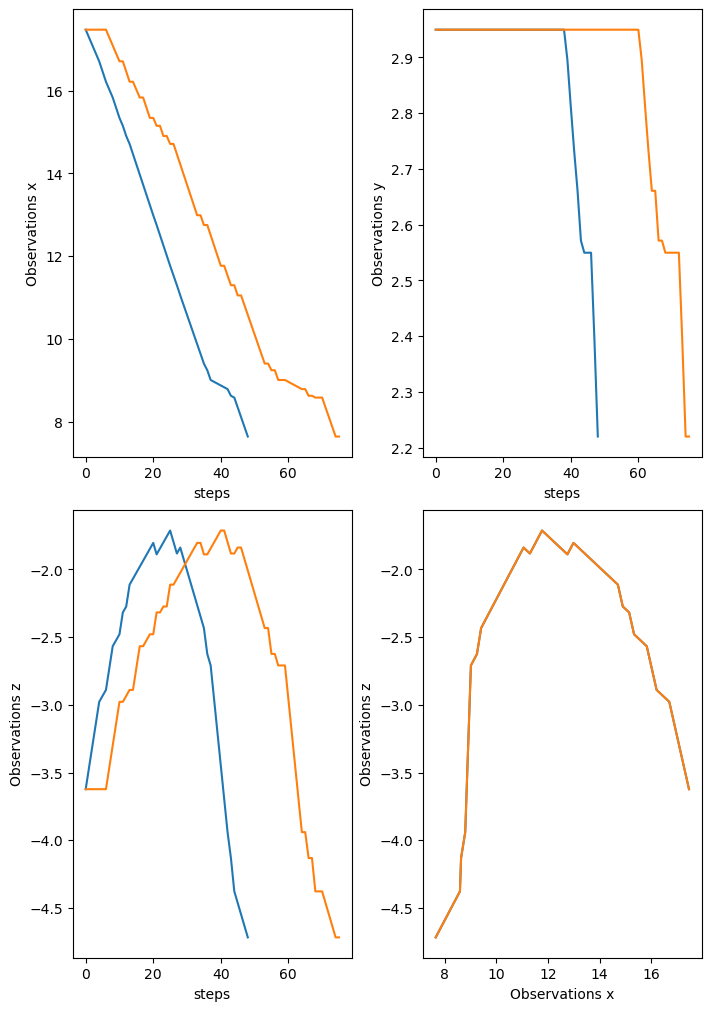

In [48]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(7, 10), constrained_layout=True)

axs[0,0].plot(gt_locations[:,0])
axs[0,0].plot(gt_locations_rollouts[:,0])
axs[0,0].set_xlabel('steps'); axs[0,0].set_ylabel('Observations x')

axs[0,1].plot(gt_locations[:,1])
axs[0,1].plot(gt_locations_rollouts[:,1])
axs[0,1].set_xlabel('steps'); axs[0,1].set_ylabel('Observations y')

axs[1,0].plot(gt_locations[:,2])
axs[1,0].plot(gt_locations_rollouts[:,2])
axs[1,0].set_xlabel('steps'); axs[1,0].set_ylabel('Observations z')

axs[1,1].plot(gt_locations[:,0], gt_locations[:,2])
axs[1,1].plot(gt_locations_rollouts[:,0], gt_locations_rollouts[:,2])
axs[1,1].set_xlabel('Observations x'); axs[1,1].set_ylabel('Observations z')